$$
\newcommand{\mymat}[1]{
\left[
\begin{array}{rrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}
#1
\end{array}
\right]
}
\newcommand{\myaug}[1]{
\left[
\begin{array}{rrr|r}
#1
\end{array}
\right]
}
\newcommand{\myp}[1]{\left( #1 \right)}
\newcommand{\myb}[1]{\left[ #1 \right]}
\newcommand{\myv}[1]{\left< #1 \right>}
\newcommand{\mys}[1]{\left\{ #1 \right\}}
\newcommand{\myab}[1]{\left| #1 \right|}
\newcommand{\bx}{{\bf x}}
\newcommand{\by}{{\bf y}}
\newcommand{\bu}{{\bf u}}
\newcommand{\bv}{{\bf v}}
\newcommand{\bw}{{\bf w}}
\newcommand{\be}{{\bf e}}
\newcommand{\R}[1]{\mathbb{R}^{ #1 }}
\newcommand{\hs}{\hspace{1mm}}
$$

#Least-Squares/Regression and Data Fitting

***

<br>

Let's recall from the last time the idea of projecting a vector onto a subspace spanned by the columns of a matrix. 

<br>

**Example 1**: Find the projection of ${\bf b} = \mymat{6 \\ 0 \\ 0}$ onto the space spanned by the columns of $A = \mymat{ 1 & 0 \\ 1 & 1 \\ 1 & 2}$.

<br>

The projection vector is ${\bf p} = A \hat{{\bf x}}$ where $\hat{{\bf x}}$ solves the normal equations $A^TA\hat{\bf x} = A^T{\bf b}$.  We have 

<br>

$$
A^TA = 
\mymat{
1 & 1 & 1 \\ 
0 & 1 & 2 
}
\mymat{
1 & 0 \\
1 & 1 \\
1 & 2
}
= 
\mymat{
3 & 3 \\
3 & 5
}
\quad \textrm{and} \quad 
A^T{\bf b} = \mymat{6 \\ 0}
$$

<br>

Solving the normal equations, we have 

<br>

$$
\left[
\begin{array}{rr|r}
3 & 3 & 6 \\
3 & 5 & 0 
\end{array}
\right]
\quad \sim \quad
\left[
\begin{array}{rr|r}
3 & 3 & 6 \\
0 & 2 & -6 
\end{array}
\right]
\quad \Rightarrow \quad 
\hat{x}_2 = -3, 
\quad \hat{x}_1 = (6-3(-3))/3 = 5
\quad \Rightarrow \quad 
\hat{\bf x} = \mymat{5 \\ -3}
$$

<br>

To find the projection vector we multiply $A$ by $\hat{\bf x}$

<br>

$$
{\bf p} = A\hat{\bf x} = 
\mymat{
1 & 0 \\
1 & 1 \\
1 & 2 
}
\mymat{5 \\ -3} = 
\mymat{
5 \\ 
2 \\ 
-1
}
$$

<br>

So the closest vector to ${\bf b} = \mymat{6 \\ 0 \\ 0}$ in the subspace spanned by the columsn of $A$ is ${\bf p} = \mymat{5 \\ 2 \\ -1}$.

<br>

Now let's look at another problem.  

<br>

**Example 2**: Find the line that best fits the data $\myp{t_1,b_1} = (0,6)$, $\myp{t_2,b_2} = (1,0)$, and $\myp{t_3,b_3} = (2,0)$. The data looks as follows: 

<br>

In [2]:
using PyPlot

INFO: Loading help data...


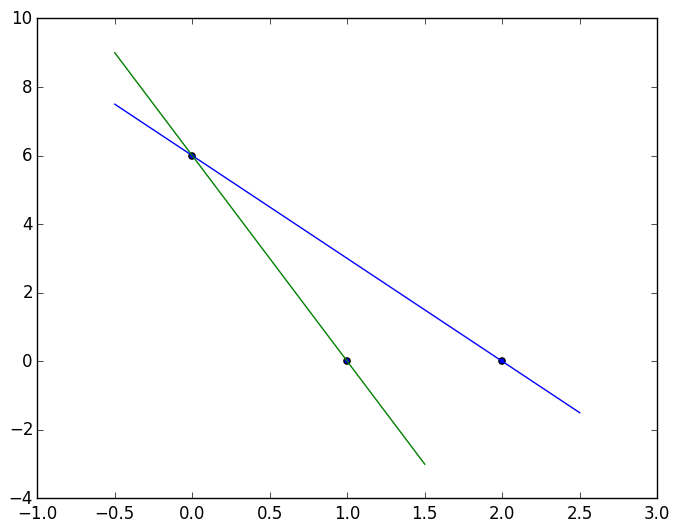

In [3]:
t = [0,1,2]
b = [6,0,0]
scatter(t,b)
plot([-.5,2.5],[6-3*(-.5),6-3*2.5])
plot([-.5,1.5],[6-6*(-.5),6-6*1.5]);

It should be clear from the plot of the data that we'll never be able to find a line that captures all three of the data points exactly.  But maybe we can find a line that, in some sense, represents all three of the points in the best possible way. 

Suppose that the data approximately satisfies a linear relationship of the form 

<br>


$$
b = C + Dt 
$$

<br>

Our goal is to find the values $C$ and $D$ such that this **linear model** does a good job of explaining the data.  Let's see what happens if we attempt to find $C$ and $D$ by plugging in the three data points: 

<br>

$$
\begin{array}{llr}
t = 0 & & C + D \cdot 0 = 6 \\
t = 1 & & C + D \cdot 1 = 0 \\
t = 2 & & C + D \cdot 2 = 0 \\
\end{array}
$$

<br>

Notice that we can write the three equations as a single matrix equation 

<br>

$$
\mymat{
1 & 0 \\
1 & 1 \\
1 & 2 \\
}
\mymat{C \\ D}
= 
\mymat{6 \\ 0 \\ 0} 
\quad \Leftrightarrow \quad 
A{\bf x} = {\bf b}
$$

<br>

Note that $A\bx = {\bf b}$ is not solvable exactly, but we can still find an inexact solution that is, in some sense, the best inexact solution. 

<br>

Recall from **Example 1** that the projection of ${\bf b} = \mymat{6 \\ 0 \\ 0}$ onto the column space of $A$ was 

<br>

$$
{\bf p} = A\hat{\bf x} = 
\mymat{
1 & 0 \\
1 & 1 \\
1 & 2 \\
}
\mymat{5 \\ -3} = 
\mymat{5 \\ 2 \\ -1}
$$

<br>

It turns out that the projection process gives us this *best* solution in some sense.  

<br>

The vector $\hat{\bf x} = \mymat{5 \\ -3}$ are the uknown coefficients $C$ and $D$ in the proposed lienar model.  So the best line that fits the data is 

<br>

$$
b = 5 - 3t 
$$

<br>

Plugging the data into the model gives 

<br>

$$
\begin{array}{llrcrcr}
t = 0 & & 5 -3 \cdot 0 &=& 5 & vs & 6 \\
t = 1 & & 5 -3 \cdot 1 &=& 2 & vs & 0 \\
t = 2 & & 5 -3 \cdot 2 &=& -1 & vs & 0 \\
\end{array}
$$

<br>

Futhermore, if we plot the linear model along side the data we have

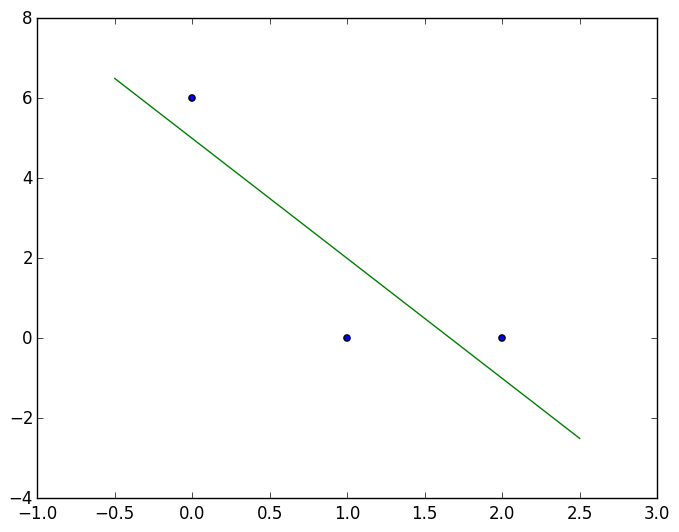

In [4]:
t = [0,1,2]
b = [6,0,0]
scatter(t,b)
plot([-.5,2.5],[5-3*(-.5),5-3*2.5],color="green");

While the linear model can't actually satisfy all three of the data points simultaneously, it does a pretty good job of capturing each one

Note that evaluating the *best* linear model is the same as projecting the data onto the column space of $A$! Furthermore, notice that if we compute the error in the model predictions we get 

<br>

$$
{\bf e} = {\bf b} - {\bf p} = \mymat{6 \\ 0 \\ 0} - \mymat{5 \\ 2 \\ -1} = \mymat{1 \\ -2 \\ 1}
$$

<br>

and this ${\bf e}$ is orthogonal to the columns of $A$ (as expected, because ${\bf p}$ is a projection)

<br>

$$
A = \mymat{1 & 0 \\ 1 & 1 \\ 1 & 2} \quad \Rightarrow \quad \mymat{1 \\ 1 \\ 1} \cdot \mymat{1 \\ -2 \\ 1} = 1 - 2 + 1 = 0
\quad \textrm{and} \quad 
\mymat{0 \\ 1 \\ 2} \cdot \mymat{1 \\ -2 \\ 1} = 0 - 1 + 2 = 0
$$

<br>

What happens if we have even more data points and fitting by a line doesn't cut it?  Suppose we have $m$ points $\myp{t_1,b_1}$, $\myp{t_2,b_2}, \ldots \myp{t_m,b_m}$ and want to find a quadratic model that fits the data, of the form 

<br>

$$
b = C + D t + F t^2 
$$

<br>

Plugging in all $m$ points into the model gives 

<br>

$$
\begin{array}{rcl}
C + Dt_1 + Ft_1^2 &=& b_1 \\
C + Dt_2 + Ft_2^2 &=& b_2 \\
&\vdots&  \\
C + Dt_m + Ft_m^2 &=& b_m \\
\end{array}
\quad \Rightarrow \quad 
\mymat{
1 & t_1 & t_1^2 \\
1 & t_2 & t_2^2 \\
\vdots & \vdots & \vdots \\
1 & t_m & t_m^2 \\
}
\mymat{
C \\
D \\
F
}
= 
\mymat{
b_1 \\
b_2 \\
\vdots \\
b_m 
}
$$

<br>

Again, as long as $m > 3$ we have an overdetermined system which we have no hope of solving.  Instead, the best we can do is project the vector ${\bf b}$ onto the columns of the matrix $A$. The projection vector is ${\bf p} = A\hat{\bf x}$.  The projection coefficients $\hat{\bf x}$ are the solution to the normal equations $A^TA\hat{\bf x} = A^T{\bf b}$ and they're also the coefficients $C$, $D$, and $F$ in the best quadratic model. 

<br>

Let's see what happens when we try to fit a quadratic model to the data from **Example 2**. 

<br>

**Example 3**: Fit a quadratic model to the data points $(0,6)$, $(1,0)$, and $(2,0$).

<br>

The matrix $A$ is the matrix that has all $1$'2 in it's first column, the $t$-values in it's second column, and the squared $t$-values in it's third column: 

<br>

$$
A = \mymat{
1 & 0 & 0 \\
1 & 1 & 1 \\
1 & 2 & 4 
}
$$

<br>

Solving the normal equations for $\hat{x}$, we have 

<br>

$$
A^TA = 
\mymat{
3 & 3 & 5 \\
3 & 5 & 9 \\
5 & 9 & 17
}
\quad \Rightarrow \quad 
A^T{\bf b} = 
\mymat{
6 \\
0 \\
0
}
\quad \Rightarrow \quad
\hat{\bf x} = 
\mymat{
6 \\
-9 \\
3 
}
\quad \Rightarrow \quad
b = 6 - 9t + 3t^2
$$

<br>

Let's check how well our best quadratic approximation captures the data: 

<br>

Plugging the data into the model gives 

<br>

$$
\begin{array}{llrcr}
t = 0 & & 6 -9 \cdot 0 + 3 \cdot 0 &=& 6 \\
t = 1 & & 6 -9 \cdot 1 + 3 \cdot 1 &=& 0 \\
t = 2 & & 6 -9 \cdot 2 + 3 \cdot 4 &=& 0 \\
\end{array}
$$

<br>

Wait a sec -- this time the model captures the data exactly.  Sure enough, we can verify this by plotting the data and the best quadratic model 

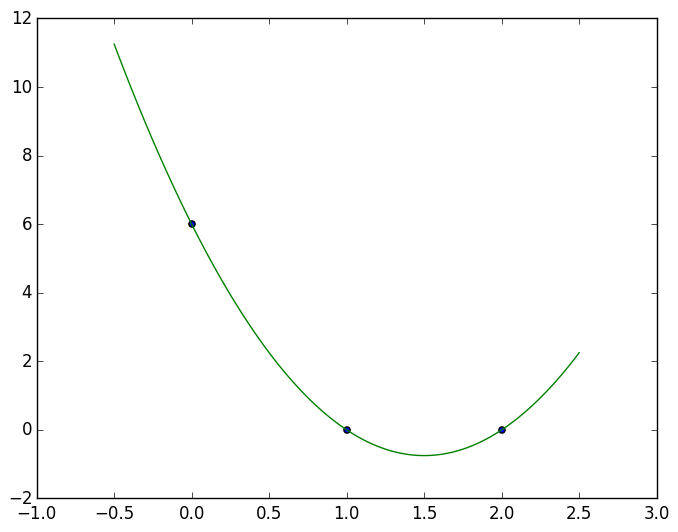

In [5]:
t = [0,1,2]
b = [6,0,0]
scatter(t,b)
ts = linspace(-.5,2.5)
plot(ts, 6-9*ts+3*ts.^2, color="green");

So how come with the linear model we could only approximately capture the data, but with the quadratic model we could get it exactly? 

<br>

Notice that for the quadratic model the $A$ in the $A\bx = {\bf b}$ we were trying to solve was $3 \times 3$.  It turns out (and you can check) that in this case $A$ is nonsingular, and therefore $A\bx = {\bf b}$ has an exact solution. 

<br>

In practice this is usually not the case.  Typically you have many many more than three data points and you get an overdetermined system.  Since you have very little hope of solving an overdetermined system exactly, the *best* solution is the quadratic model whose coefficients are obtained by solving the normal equations. 

<br>

OK, so if we have more than three data points, maybe we should use a more powerful model than just a quadratic? It turns out that we can fit as high degree of polynomial model as we like.  Suppose we want to fit an $n$-degree polynomial to our $m$-dimensional data set.  In general, the model would look like

<br>

$$
b = \hat{x}_1 + \hat{x}_2 t + \hat{x}_3 t^2 + \cdots + \hat{x}_{n+1}t^n 
$$

<br>

Plugging in all $m$ data points into the polynomial model gives a linear system of the form $A\hat{\bf x} = {\bf b}$ with 

<br>

$$
A = 
\mymat{
1 & t_1 & t_1^2 & \cdots & t_1^n \\
1 & t_2 & t_2^2 & \cdots & t_2^n \\
\vdots & \vdots & & \vdots \\ 
1 & t_m & t_m^2 & \cdots & t_m^n \\
}
$$

<br>

To find the coefficients that give us the best polynomial model of degree $n$ we solve the normal equations $A^TA \hat{\bf x} = A^T{\bf b}$ for $\hat{\bf x}$.

A word of **warning**.  It may seem like a good idea to use as high-degree model as you can in order to fit the data as well as possible.  But we have to think about what the model will be used for.  Typically, if you have a bunch of data you want to explain, your goal is to find a good model that explains the underlying phenomenon behind the data.  In cases like this, simplicity is better.  Once you have the model it can be used to predict values associated with data that is not included in the original set.  In this case, a simpler model will have more explanatory power.  If you use too complicated of a model, the model will work really hard to match the data you give it, and do a very poor job of predicting other data points. 

**Example 4**: Consider the following data set with $m = 20$ points:

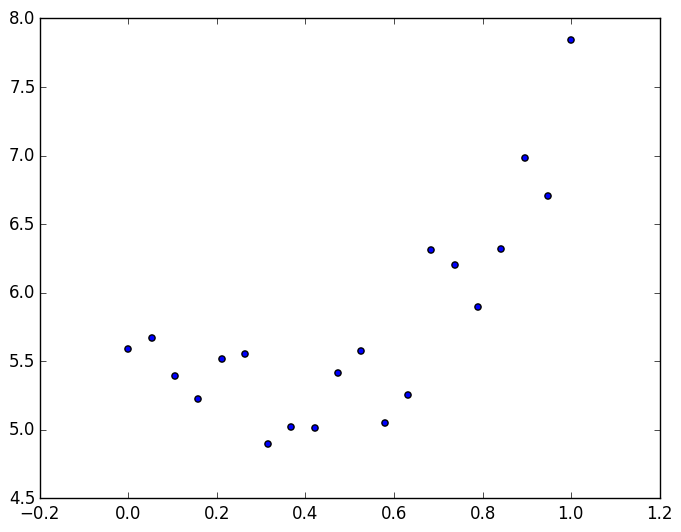

In [6]:
srand(1234)
m = 20
t = linspace(0,1,m)
b = 5 - 2*t + 3*t.^2 + t.^3 + 1*rand(m)
scatter(t,b);

If we fit a linear model to this we get the following:

In [7]:
A = [ones(m,1) t]
xhat = A'*A \ A'*b

2-element Array{Float64,1}:
 4.91513
 1.71139

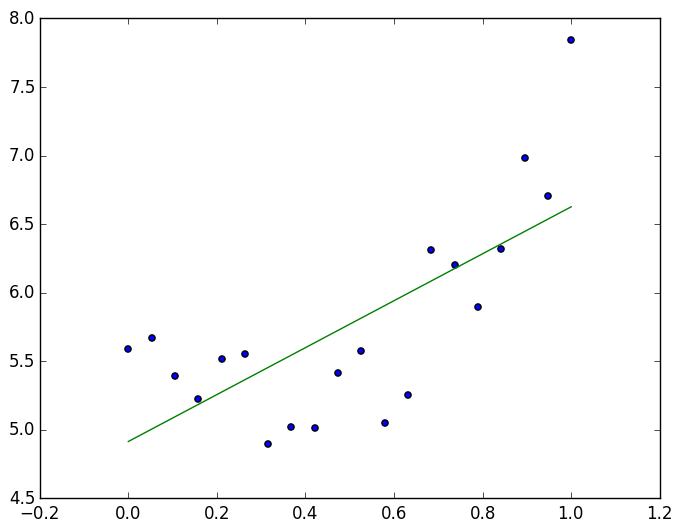

In [8]:
scatter(t,b);
plot(t, xhat[1]+xhat[2]*t, color="green");

OK, so the linear model looks just-OK.  Let's try a quadratic. 

In [9]:
A = [ones(m,1) t t.^2]
xhat = A'*A \ A'*b

3-element Array{Float64,1}:
  5.76702
 -3.68393
  5.39532

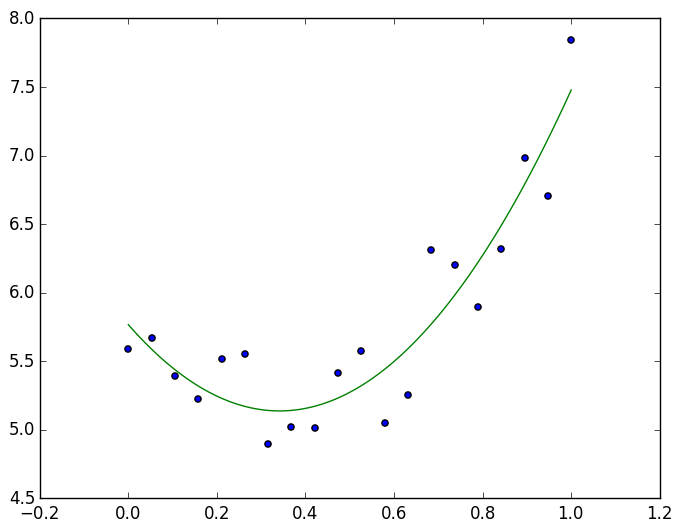

In [11]:
scatter(t,b);
ts = linspace(t[1],t[end],100)
plot(ts, xhat[1]+xhat[2]*ts+xhat[3]*ts.^2, color="green");

The quadratic model looks much better.  It of course does not capture every point, but it seems to do a good job of capturing the main trend in the data.  Let's see what happens if we use a super-high degree polynomial.

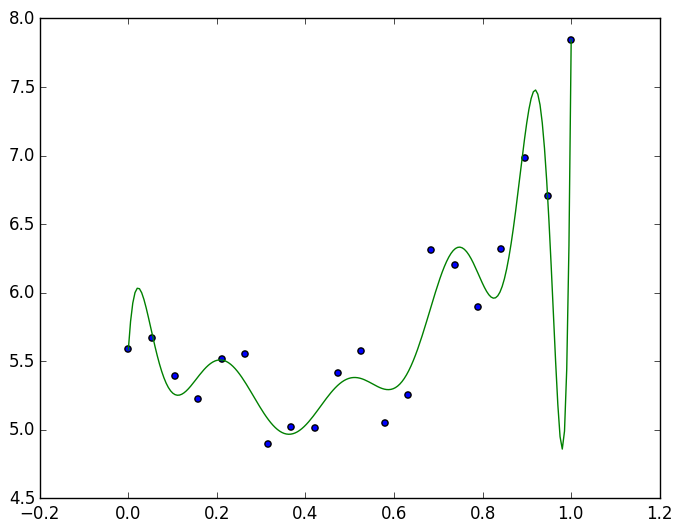

In [15]:
n = 15
A = zeros(m,n+1)
for jj=1:n+1
    A[:,jj] = t.^(jj-1)
end
xhat = A'*A \ A'*b
ts = linspace(t[1],t[end],200)
Ax = zeros(size(ts,1),1)
for jj=1:n+1
    Ax += xhat[jj]*ts.^(jj-1)
end
scatter(t,b);
plot(ts, Ax, color="green");

Notice that the degree-15 polynomial model gets closer to many of the data points, but now it's all wiggly.  It no longer seems to capture the general trend of the data, and would probably do a very poor job of predicting values not included in the original data set. 

OK, so what exactly is happening when we fit a model to a bunch of data.  And what exactly do we mean when we say that it's the *best* model? It's helpful to go back to the linear case.  Recall that for the data in Example 2, we found that the best-fitting line was given by $b = 5 - 3t$ and looked as follows  

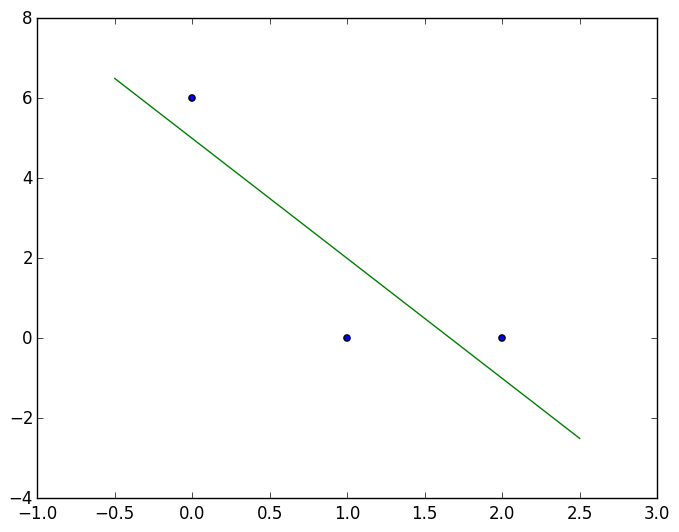

In [42]:
t = [0,1,2]
b = [6,0,0]
scatter(t,b)
plot([-.5,2.5],[5-3*(-.5),5-3*2.5],color="green");

If we plot the values that the linear model predicts for $t=0,1,$ and $2$, we have 

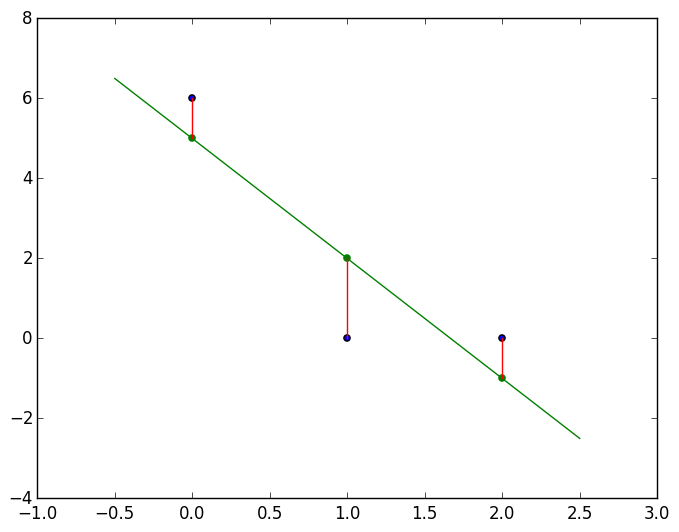

In [47]:
t = [0,1,2]
b = [6,0,0]
scatter(t,b)
plot([-.5,2.5],[5-3*(-.5),5-3*2.5],color="green");
scatter(t,5-3*t,color="green")
for ii=1:length(t)
    plot([t[ii],t[ii]], [b[ii], 5-3*t[ii]],color="red")
end

The red lines indicate the difference between the actual data ${\bf b}$ and the predicted data ${\bf p}$.  These distances are exactly the components of the error vector ${\bf e} = {\bf b} - {\bf p}$. We have

<br>

$$
{\bf e} = {\bf b} - {\bf p} = {\bf b} - A\hat{\bx} = 
\mymat{
b_1 - \hat{x}_1 - \hat{x}_2 t_1 \\
b_2 - \hat{x}_1 - \hat{x}_2 t_2 \\
b_3 - \hat{x}_1 - \hat{x}_2 t_3 \\
}
= 
\mymat{
e_1 \\
e_2 \\
e_3
}
$$

<br>

Now, if we want to pick the model coefficients to give us the best model possible, we have to decide how we are measuring *best*.  There are a lot of things we could try.  We could try to choose coefficients so that the *worst* of all of the errors is minimized.  Or we could try to choose coefficients so that the sum of the errors in absolute values is minimized.  

It turns out that what we're doing when we choose the coefficients by solving the normal equations is minimizing the sum of the squares of the error terms.  In other words, we're choosing $\hat{\bx}$ to minimize $E = e_1^2 + e_2^2 + e_3^2$. Or, in other familiar terms, we're minimzing 

<br>

$$
E = e_1^2 + e_2^2 + e_3^2 = \|{\bf e}\|^2 = \|A{\bf x} - {\bf b}\|^2
$$

<br>

Since finding the best model by solving the normal equations miminzes the squares of the errors in the model, this method of data fitting is often called the **Least-Squares Problem**. 

<br>

So why does this work?  Why is the $\hat{\bf x}$ that solves the normal equations and gives the projection the one that minimizes $E = \|A{\bf x} - {\bf b}\|^2$? Suppose we write ${\bf b}$ as the sum of an error term and some vector in the column space of $A$: ${\bf b} = {\bf p} + {\bf e}$.  Then, we have 

<br>

$$
\begin{array}{rcl}
\|A\bx - {\bf b}\|^2 &=& \|A\bx - {\bf p} - {\bf e}\|^2 \\
&=& \myp{A\bx - {\bf p} - {\bf e}}^T\myp{A\bx - {\bf p} - {\bf e}} \\
 &=& \myp{A\bx - {\bf p}}^T \myp{A\bx - {\bf p}} + 2\myp{A\bx - {\bf p}}^T {\bf e} + {\bf e}^T{\bf e} \\ 
 &=& \|A\bx - {\bf p}\|^2 + 2\myp{A\bx - {\bf p}}^T {\bf e} + \|{\bf e}\|^2 \\
\end{array}
$$

<br>

Now note that the first two terms will become zero if we choose $\bx$ to be the solution to the normal equations, because $A\hat{\bx}$ gives the projection vector and $A\hat{\bx} - {\bf p} = {\bf 0}$. We're then left with 

<br>

$$
\|A\bx - {\bf b}\|^2 = \|{\bf e}\|^2
$$

<br>